In [1]:
## tensorflow araba tahmini

In [2]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [3]:
dataFrame = pd.read_excel("merc.xlsx")

In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


In [5]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<ipython-input-6-e5cf92588753>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame['price'])


<Axes: xlabel='price', ylabel='Density'>

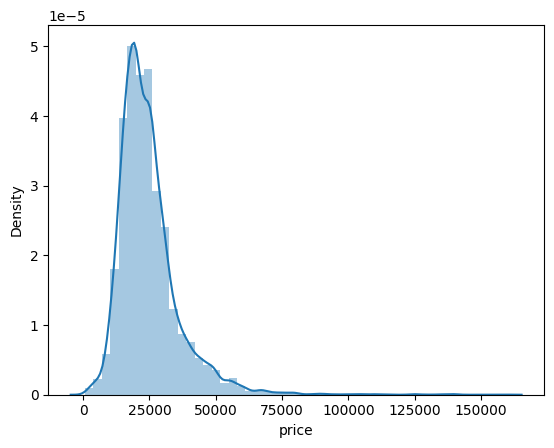

In [6]:
sbn.distplot(dataFrame['price'])

In [7]:
dataFrame.corr()

<ipython-input-7-6bf2272b98ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [8]:
dataFrame.corr()["price"].sort_values()

<ipython-input-8-8576262b5b0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()["price"].sort_values()


mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [9]:
len(dataFrame) * 0.01

131.19

In [10]:
dataFrame_1 = dataFrame.sort_values("price", ascending = False).iloc[131:]

In [11]:
dataFrame_1

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


<ipython-input-12-e9dd87602d81>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataFrame_1["price"])


<Axes: xlabel='price', ylabel='Density'>

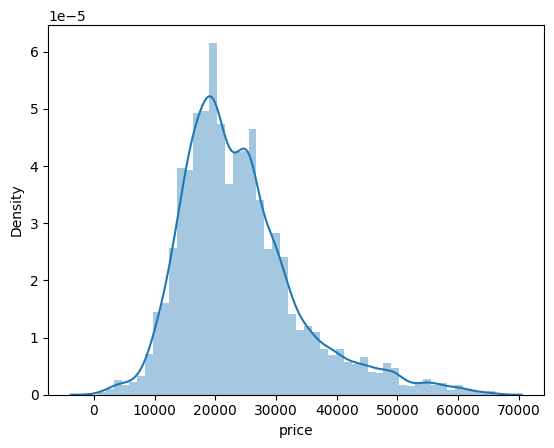

In [12]:
sbn.distplot(dataFrame_1["price"])

In [13]:
dataFrame_1.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [14]:
dataFrame_1.groupby("year").mean()["price"]

<ipython-input-14-06a8ffa987b8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataFrame_1.groupby("year").mean()["price"]


year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [15]:
dataFrame_2 = dataFrame_1[dataFrame_1.year != 1970]

In [16]:
dataFrame_2.groupby("year").mean()["price"]

<ipython-input-16-5bf4d1baab18>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataFrame_2.groupby("year").mean()["price"]


year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [17]:
dataFrame_2 = dataFrame_2.drop("transmission", axis = 1)

In [18]:
dataFrame_2

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [34]:
y = dataFrame_2["price"].values
x = dataFrame_2.drop("price",axis=1).values

In [35]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650])

In [36]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [39]:
print(f'x_train: {len(x_train)}')
print(f'x_test: {len(x_test)}')
print(f'y_train: {len(y_train)}')
print(f'y_test: {len(y_test)}')

x_train: 9090
x_test: 3897
y_train: 9090
y_test: 3897


In [40]:
print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

x_train.shape: (9090, 5)
x_test.shape: (3897, 5)
y_train.shape: (9090,)
y_test.shape: (3897,)


In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
x_train = scaler.fit_transform(x_train)

In [51]:
x_test = scaler.transform(x_test)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [90]:
model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), epochs=300)

Epoch 1/300
285/285 [==============================] - 3s 10ms/step - loss: 18269594.0000 - val_loss: 25182054.0000
Epoch 2/300
285/285 [==============================] - 2s 7ms/step - loss: 18129406.0000 - val_loss: 26043782.0000
Epoch 3/300
285/285 [==============================] - 1s 2ms/step - loss: 18109888.0000 - val_loss: 28452332.0000
Epoch 4/300
285/285 [==============================] - 1s 3ms/step - loss: 18094970.0000 - val_loss: 24520772.0000
Epoch 5/300
285/285 [==============================] - 1s 3ms/step - loss: 18110150.0000 - val_loss: 26565500.0000
Epoch 6/300
285/285 [==============================] - 1s 3ms/step - loss: 18110632.0000 - val_loss: 26156704.0000
Epoch 7/300
285/285 [==============================] - 1s 2ms/step - loss: 18076714.0000 - val_loss: 25750798.0000
Epoch 8/300
285/285 [==============================] - 1s 2ms/step - loss: 18105190.0000 - val_loss: 25494104.0000
Epoch 9/300
285/285 [==============================] - 1s 2ms/step - loss: 1807

In [91]:
kayipVerisi = pd.DataFrame(model.history.history)

<Axes: >

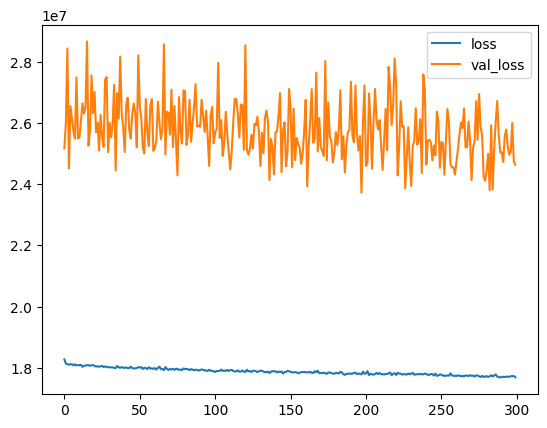

In [92]:
kayipVerisi.plot()

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [94]:
tahminDizisi = model.predict(x_test)
tahminDizisi

122/122 [==============================] - 0s 1ms/step


array([[18283.354],
       [20850.684],
       [25585.248],
       ...,
       [24283.635],
       [ 7866.593],
       [23804.168]], dtype=float32)

In [95]:
mean_absolute_error(y_test,tahminDizisi)

3666.3183710902417

In [96]:
dataFrame_2.iloc[5]

year           2018.0
price         64999.0
mileage       41102.0
tax             145.0
mpg              23.0
engineSize        5.5
Name: 8083, dtype: float64

In [97]:
newCar = [2019,40000,135,20,6]
newCar = pd.Series(newCar)
type(newCar)
newCar = scaler.transform(newCar.values.reshape(-1,5))
model.predict(newCar)

1/1 [==============================] - 0s 22ms/step


array([[7.221828e+08]], dtype=float32)